# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

/home/infinity/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X, Y = make_circles(100, factor = .1, noise = .1) 
#print(X, Y)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [7]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

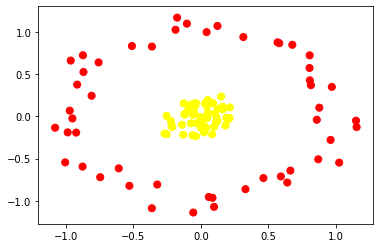

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

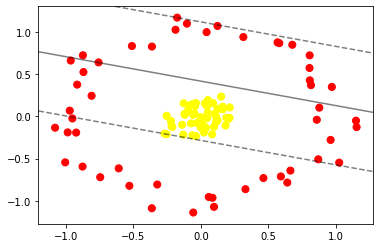

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
# llamamos la funcion crada
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [13]:
r = np.exp(-(X**2).sum(1))# representacion gauseana

In [14]:
r

array([0.97553297, 0.97729714, 0.98863068, 0.99694458, 0.97643757,
       0.98585304, 0.33830484, 0.30722854, 0.43553551, 0.37619212,
       0.45873344, 0.38885452, 0.99648569, 0.9751227 , 0.94940836,
       0.42704487, 0.89718098, 0.41186324, 0.29823108, 0.47058352,
       0.49081515, 0.96753145, 0.44481343, 0.99539694, 0.36796802,
       0.96460252, 0.35790344, 0.97145673, 0.97575123, 0.96121913,
       0.9799849 , 0.98559775, 0.98424116, 0.94127332, 0.31492361,
       0.9583494 , 0.3631101 , 0.9378504 , 0.96345787, 0.42483496,
       0.25991111, 0.99510262, 0.98391587, 0.94919262, 0.2735062 ,
       0.97488891, 0.47373691, 0.99274193, 0.3424619 , 0.3112081 ,
       0.98186322, 0.95542672, 0.94551996, 0.25670607, 0.38535288,
       0.30948667, 0.2693458 , 0.39259314, 0.36560989, 0.26069755,
       0.9869729 , 0.96142737, 0.27170468, 0.27775015, 0.99583087,
       0.35986469, 0.37097872, 0.32694755, 0.31526448, 0.40184622,
       0.42713131, 0.93804087, 0.3765411 , 0.33918223, 0.24888

In [20]:
from mpl_toolkits import mplot3d

In [24]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [25]:
from ipywidgets import interact, fixed

In [26]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,45,50,60,80,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 9.80320810e-02, -1.23130131e-01],
       [ 1.24017865e-01,  8.70867618e-02],
       [ 1.02343555e-01,  3.09877138e-02],
       [-4.60680726e-02,  3.06239840e-02],
       [ 2.94882955e-02,  1.51574753e-01],
       [ 2.63368181e-02, -1.16423162e-01],
       [ 5.80386944e-01,  8.64267838e-01],
       [-1.07796730e+00, -1.34721501e-01],
       [ 8.06543687e-01,  4.25048502e-01],
       [-7.56176391e-01,  6.37065587e-01],
       [ 8.76833746e-01,  1.02218165e-01],
       [-9.69556322e-01,  6.71605084e-02],
       [-5.66107551e-02,  1.77685899e-02],
       [-5.45920268e-02,  1.49035820e-01],
       [-2.20880321e-01, -5.59298584e-02],
       [ 6.62744580e-01, -6.41588503e-01],
       [-2.52790627e-01, -2.11174274e-01],
       [-9.22008156e-01, -1.92262544e-01],
       [-1.02671163e-01,  1.09514625e+00],
       [-3.22258466e-01, -8.06183169e-01],
       [-8.07975884e-01,  2.42616299e-01],
       [ 1.62427382e-01,  8.13922429e-02],
       

In [23]:
rbf = SVC(kernel="rbf", C=1E6)# kernel="rbf" radial base funcion
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

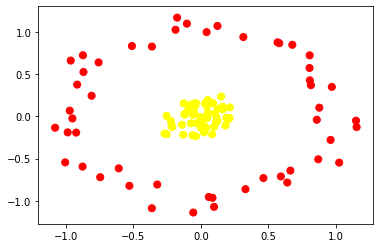

In [27]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")


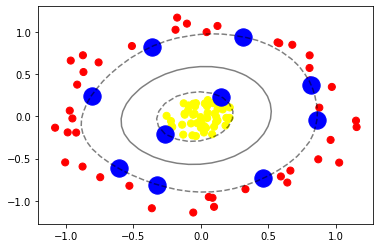

In [28]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)


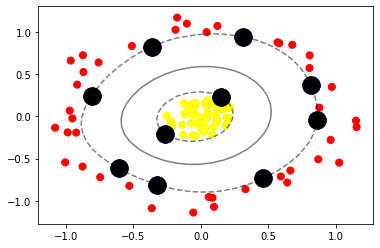

In [30]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)

plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="black")

## Ajustar los parámetros de SVM
https://scikit-learn.org/

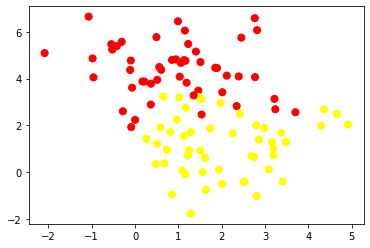

In [39]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

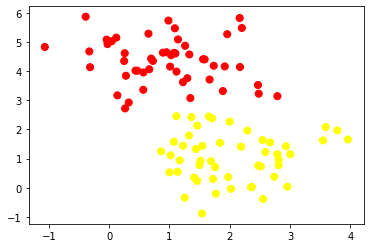

In [40]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

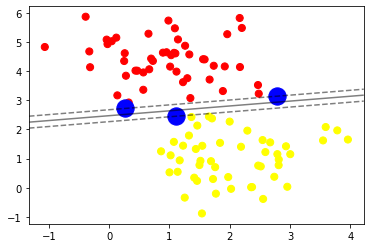

In [45]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=20)
model.fit(X,Y)
plt_svc(model)

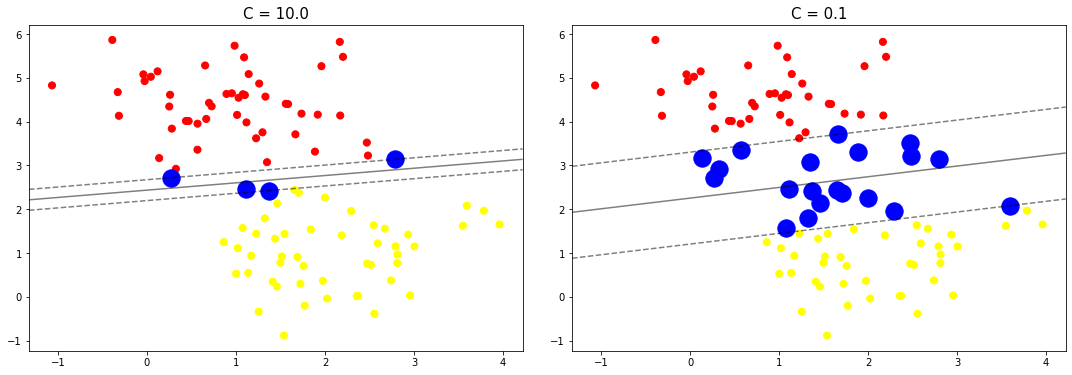

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]): # para variar C y el nivel de clasificacion
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

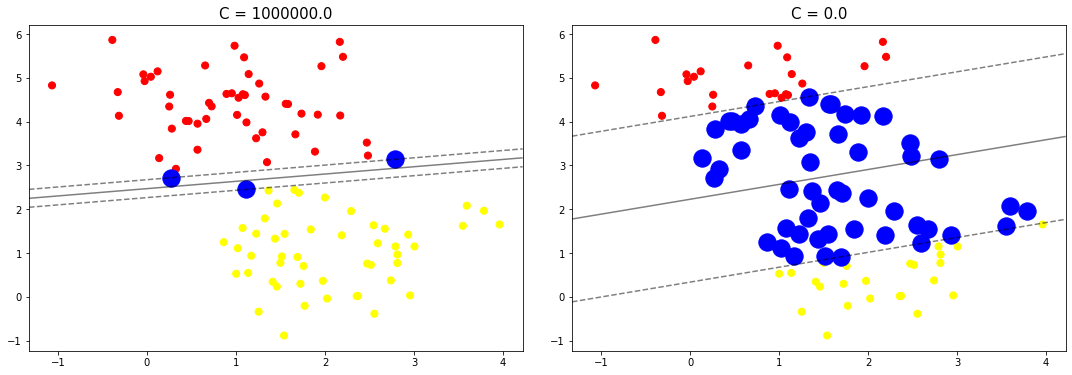

In [34]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [1E6, 0.01]): # para variar C y el nivel de clasificacion
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)